### Get Nifty Historical Data for 5yr


In [ ]:
import yfinance as yf
import pandas as pd

nifty = yf.download("^NSEI", start="2020-01-01", end="2025-09-01", interval="1d")

/tmp/ipython-input-1930103007.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2020-01-01", end="2025-09-01", interval="1d" )
[*********************100%***********************]  1 of 1 completed


In [ ]:
nifty.columns = nifty.columns.get_level_values(0)
nifty = nifty.drop(columns=["Volume"])
display(nifty.tail(10))


Price,Close,High,Low,Open
Date,,,,
2025-08-14,24631.300781,24673.650391,24596.900391,24607.250000
2025-08-18,24876.949219,25022.000000,24852.849609,24938.199219
2025-08-19,24980.650391,25012.650391,24873.949219,24891.349609
2025-08-20,25050.550781,25088.699219,24929.699219,24965.800781
2025-08-21,25083.750000,25153.650391,25054.900391,25142.000000
2025-08-22,24870.099609,25084.849609,24859.150391,25064.150391
2025-08-25,24967.750000,25021.550781,24894.349609,24949.150391
2025-08-26,24712.050781,24919.650391,24689.599609,24899.500000
2025-08-28,24500.900391,24702.650391,24481.599609,24695.800781


In [ ]:
nifty["intraday_change"] = nifty["Close"] - nifty["Open"]
display(nifty.tail(10))

Price,Close,High,Low,Open,intraday_change
Date,,,,,
2025-08-14,24631.300781,24673.650391,24596.900391,24607.250000,24.050781
2025-08-18,24876.949219,25022.000000,24852.849609,24938.199219,-61.250000
2025-08-19,24980.650391,25012.650391,24873.949219,24891.349609,89.300781
2025-08-20,25050.550781,25088.699219,24929.699219,24965.800781,84.750000
2025-08-21,25083.750000,25153.650391,25054.900391,25142.000000,-58.250000
2025-08-22,24870.099609,25084.849609,24859.150391,25064.150391,-194.050781
2025-08-25,24967.750000,25021.550781,24894.349609,24949.150391,18.599609
2025-08-26,24712.050781,24919.650391,24689.599609,24899.500000,-187.449219
2025-08-28,24500.900391,24702.650391,24481.599609,24695.800781,-194.900391


### How many points Nifty moved intraday

In [ ]:
 # Sum of all intraday changes
total_intraday_change = nifty["intraday_change"].sum()

print("Total Intraday Change:", total_intraday_change)

Total Intraday Change: -13705.53564453125


In [ ]:
nifty["overnight_change"] = nifty["Open"] - nifty["Close"].shift(1)
display(nifty.tail(10))

Price,Close,High,Low,Open,intraday_change,overnight_change
Date,,,,,,
2025-08-14,24631.300781,24673.650391,24596.900391,24607.250000,24.050781,-12.099609
2025-08-18,24876.949219,25022.000000,24852.849609,24938.199219,-61.250000,306.898438
2025-08-19,24980.650391,25012.650391,24873.949219,24891.349609,89.300781,14.400391
2025-08-20,25050.550781,25088.699219,24929.699219,24965.800781,84.750000,-14.849609
2025-08-21,25083.750000,25153.650391,25054.900391,25142.000000,-58.250000,91.449219
2025-08-22,24870.099609,25084.849609,24859.150391,25064.150391,-194.050781,-19.599609
2025-08-25,24967.750000,25021.550781,24894.349609,24949.150391,18.599609,79.050781
2025-08-26,24712.050781,24919.650391,24689.599609,24899.500000,-187.449219,-68.250000
2025-08-28,24500.900391,24702.650391,24481.599609,24695.800781,-194.900391,-16.250000


### How many points Nifty moved Overnight

In [ ]:
 # Sum of all overnight changes
total_overnight_change = nifty["overnight_change"].sum()

print("Total Overnight Change:", total_overnight_change)

Total Overnight Change: 25930.23486328125


<Axes: xlabel='Date'>

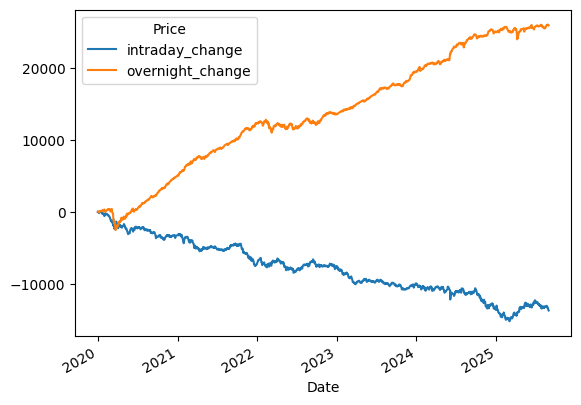

In [ ]:
nifty[["intraday_change","overnight_change"]].cumsum().plot()

In [ ]:
total_days = nifty["intraday_change"].count()
positive_days = (nifty["intraday_change"] > 0).sum()
negative_days = (nifty["intraday_change"] < 0).sum()
zero_days = (nifty["intraday_change"] == 0).sum()

win_rate = (positive_days / total_days) * 100
loss_rate = (negative_days / total_days) * 100

print("Total Days:", total_days)
print("Positive Days:", positive_days)
print("Negative Days:", negative_days)
print("Zero Days:", zero_days)

print("Win Rate ", round(win_rate, 2))
print("Loss Rate ", round(loss_rate, 2))


Total Days: 1402
Positive Days: 683
Negative Days: 719
Zero Days: 0
Win Rate  48.72
Loss Rate  51.28


In [ ]:
total_days = nifty["overnight_change"].count()
positive_days = (nifty["overnight_change"] > 0).sum()
negative_days = (nifty["overnight_change"] < 0).sum()
zero_days = (nifty["overnight_change"] == 0).sum()

win_rate = (positive_days / total_days) * 100
loss_rate = (negative_days / total_days) * 100

print("Total Days:", total_days)
print("Positive Days:", positive_days)
print("Negative Days:", negative_days)
print("Zero Days:", zero_days)

print("Win Rate ", round(win_rate, 2))
print("Loss Rate ", round(loss_rate, 2))

Total Days: 1401
Positive Days: 932
Negative Days: 469
Zero Days: 0
Win Rate  66.52
Loss Rate  33.48


## This suggests that long-term index growth is mainly fueled by overnight moves, not by intraday trading.

Traders focusing only on intraday may miss the larger structural uptrend, while swing/positional traders benefit more


“Analysis shows that Nifty gains are driven mainly by overnight moves (66.5% win rate), while intraday tends to be choppier with a lower win rate (48.7%). This highlights the importance of considering overnight exposure in trading strategies.”

In [ ]:
import pandas as pd
import numpy as np

class BTSTBacktester:
    def __init__(self, df):
        """
        df must contain ['Open', 'Close', 'High', 'Low']
        with DateTime index.
        """
        self.df = df.copy()
        self.results = {}

    def run_strategy(self, name, entry_condition):
        """
        entry_condition: function(df, i) -> bool
        Decides whether to enter trade on day i.
        """
        trades = []
        df = self.df

        for i in range(len(df) - 1):  # avoid last day (no next open)
            if entry_condition(df, i):
                entry_price = df["Close"].iloc[i]
                exit_price = df["Open"].iloc[i + 1]
                pnl = exit_price - entry_price
                trades.append(pnl)

        trades = np.array(trades)
        stats = {
            "Total Trades": len(trades),
            "Win Rate %": round((trades > 0).mean() * 100, 2),
            "Loss Rate %": round((trades < 0).mean() * 100, 2),
            "Avg Gain": round(trades[trades > 0].mean(), 2) if any(trades > 0) else 0,
            "Avg Loss": round(trades[trades < 0].mean(), 2) if any(trades < 0) else 0,
            "Total PnL": round(trades.sum(), 2),
        }

        self.results[name] = stats
        return stats

    def compare_strategies(self):
        return pd.DataFrame(self.results).T


# ================== Example Usage ==================
# Assuming your dataframe is "nifty" with Open/Close/High/Low columns

# 1. Simple BTST (always buy at close, sell next open)
def simple_btst(df, i):
    return True

# 2. Momentum Filter (buy if Close > Open)
def momentum_btst(df, i):
    return df["Close"].iloc[i] > df["Open"].iloc[i]

# 3. Hybrid (today intraday positive + yesterday overnight positive)
def hybrid_btst(df, i):
    if i == 0:
        return False
    intraday_today = df["Close"].iloc[i] > df["Open"].iloc[i]
    overnight_yday = df["Open"].iloc[i] > df["Close"].iloc[i - 1]
    return intraday_today and overnight_yday


# Run backtests
backtester = BTSTBacktester(nifty)

backtester.run_strategy("Simple BTST", simple_btst)
backtester.run_strategy("Momentum Filter", momentum_btst)
backtester.run_strategy("Hybrid", hybrid_btst)

print(backtester.compare_strategies())


                 Total Trades  Win Rate %  Loss Rate %  Avg Gain  Avg Loss  \
Simple BTST            1401.0       66.52        33.48     70.25    -84.31   
Momentum Filter         683.0       69.69        30.31     70.98    -66.27   
Hybrid                  448.0       70.31        29.69     68.19    -58.72   

                 Total PnL  
Simple BTST       25930.23  
Momentum Filter   20067.16  
Hybrid            13668.73  


In [ ]:
import pandas as pd

def momentum_btst_trades(df):
    """
    Buy if Close > Open, exit next day's Open.
    df must have ['Open','Close']
    Returns trades DataFrame + summary stats
    """
    trades = []

    for i in range(len(df) - 1):  # skip last row (no exit available)
        if df["Close"].iloc[i] > df["Open"].iloc[i]:
            trade_date = df.index[i]         # Trade initiation date
            entry_date = df.index[i]
            exit_date = df.index[i + 1]
            entry_price = df["Close"].iloc[i]
            exit_price = df["Open"].iloc[i + 1]
            pnl = exit_price - entry_price

            trades.append({
                "Trade Date": trade_date,
                "Entry Date": entry_date,
                "Exit Date": exit_date,
                "Entry Price": entry_price,
                "Exit Price": exit_price,
                "PnL": pnl
            })

    trades_df = pd.DataFrame(trades)

    # ---- Summary ----
    if not trades_df.empty:
        win_rate = round((trades_df["PnL"] > 0).mean() * 100, 2)
        loss_rate = 100 - win_rate
        avg_gain = trades_df.loc[trades_df["PnL"] > 0, "PnL"].mean()
        avg_loss = trades_df.loc[trades_df["PnL"] < 0, "PnL"].mean()
        total_pnl = trades_df["PnL"].sum()
    else:
        win_rate = loss_rate = avg_gain = avg_loss = total_pnl = 0

    stats = {
        "Total Trades": len(trades_df),
        "Win Rate %": win_rate,
        "Loss Rate %": loss_rate,
        "Avg Gain": round(avg_gain, 2) if avg_gain else 0,
        "Avg Loss": round(avg_loss, 2) if avg_loss else 0,
        "Total PnL": round(total_pnl, 2)
    }

    return trades_df, stats


# ================== Example Usage ==================
trades_df, stats = momentum_btst_trades(nifty)

print(stats)

display(trades_df.tail(10))


{'Total Trades': 683, 'Win Rate %': np.float64(69.69), 'Loss Rate %': np.float64(30.310000000000002), 'Avg Gain': np.float64(70.98), 'Avg Loss': np.float64(-66.27), 'Total PnL': np.float64(20067.16)}


,Trade Date,Entry Date,Exit Date,Entry Price,Exit Price,PnL
673,2025-07-29,2025-07-29,2025-07-30,24821.099609,24890.400391,69.300781
674,2025-07-31,2025-07-31,2025-08-01,24768.349609,24734.900391,-33.449219
675,2025-08-04,2025-08-04,2025-08-05,24722.750000,24720.250000,-2.500000
676,2025-08-07,2025-08-07,2025-08-08,24596.150391,24544.250000,-51.900391
677,2025-08-11,2025-08-11,2025-08-12,24585.050781,24563.349609,-21.701172
678,2025-08-13,2025-08-13,2025-08-14,24619.349609,24607.250000,-12.099609
679,2025-08-14,2025-08-14,2025-08-18,24631.300781,24938.199219,306.898438
680,2025-08-19,2025-08-19,2025-08-20,24980.650391,24965.800781,-14.849609
681,2025-08-20,2025-08-20,2025-08-21,25050.550781,25142.000000,91.449219
682,2025-08-25,2025-08-25,2025-08-26,24967.750000,24899.500000,-68.250000


# Trade Date, Entry Date, Exit Date, PnL, we can roll it up month by month to analyze performance.

In [ ]:
def monthly_analysis(trades_df):
    """
    Summarize trades performance by month
    """
    if trades_df.empty:
        return pd.DataFrame()

    # Ensure Trade Date is datetime
    trades_df["Trade Date"] = pd.to_datetime(trades_df["Trade Date"])

    # Group by year-month
    trades_df["YearMonth"] = trades_df["Trade Date"].dt.to_period("M")

    monthly = trades_df.groupby("YearMonth").agg(
        Total_Trades=("PnL", "count"),
        Win_Rate=("PnL", lambda x: round((x > 0).mean() * 100, 2)),
        Avg_PnL=("PnL", "mean"),
        Total_PnL=("PnL", "sum"),
        Max_Win=("PnL", "max"),
        Max_Loss=("PnL", "min")
    ).reset_index()

    return monthly


# Example Usage
monthly_report = monthly_analysis(trades_df)
display(monthly_report)


,YearMonth,Total_Trades,Win_Rate,Avg_PnL,Total_PnL,Max_Win,Max_Loss
0,2020-01,10,50.00,16.480078,164.800781,127.800781,-51.150391
1,2020-02,6,83.33,26.674642,160.047852,78.349609,-6.900391
2,2020-03,9,44.44,-148.533529,-1336.801758,307.649414,-799.750000
3,2020-04,9,55.56,35.555556,320.000000,330.650391,-326.400391
4,2020-05,7,57.14,64.857282,454.000977,387.650391,-67.899414
...,...,...,...,...,...,...,...
63,2025-04,9,55.56,74.650174,671.851562,539.798828,-182.048828
64,2025-05,11,63.64,39.295455,432.250000,412.099609,-79.500000
65,2025-06,13,76.92,35.841947,465.945312,208.000000,-172.650391
66,2025-07,9,55.56,11.422092,102.798828,75.951172,-33.451172


from matplotlib import pyplot as plt
monthly_report['Total_Trades'].plot(kind='hist', bins=20, title='Total_Trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Win_Rate'].plot(kind='hist', bins=20, title='Win_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Avg_PnL'].plot(kind='hist', bins=20, title='Avg_PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Total_PnL'].plot(kind='hist', bins=20, title='Total_PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report.plot(kind='scatter', x='Total_Trades', y='Win_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report.plot(kind='scatter', x='Win_Rate', y='Avg_PnL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report.plot(kind='scatter', x='Avg_PnL', y='Total_PnL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report.plot(kind='scatter', x='Total_PnL', y='Max_Win', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Total_Trades'].plot(kind='line', figsize=(8, 4), title='Total_Trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Win_Rate'].plot(kind='line', figsize=(8, 4), title='Win_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Avg_PnL'].plot(kind='line', figsize=(8, 4), title='Avg_PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_report['Total_PnL'].plot(kind='line', figsize=(8, 4), title='Total_PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

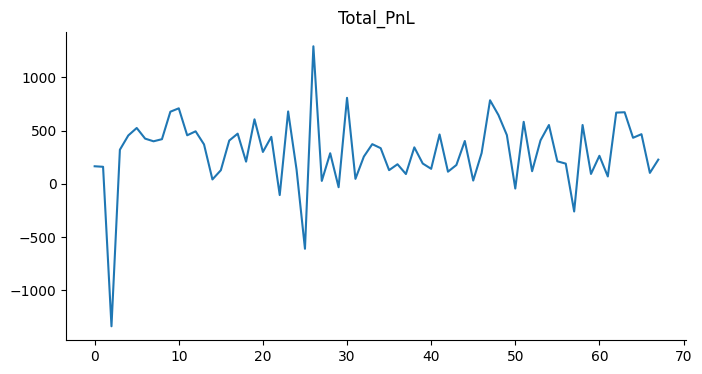

In [ ]:
# @title Total_PnL

from matplotlib import pyplot as plt
monthly_report['Total_PnL'].plot(kind='line', figsize=(8, 4), title='Total_PnL')
plt.gca().spines[['top', 'right']].set_visible(False)